In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6, 6]
plt.rcParams["figure.dpi"] = 120

In [82]:
import matplotlib.pyplot as plt


def display_target_neurons(target_list):
    # Extract x and y coordinates from the counter object
    x = [point[0] for point in target_list]
    y = [point[1] for point in target_list]

    # Set up the figure and axis
    plt.figure(figsize=(10, 15))
    plt.xticks(range(max(x) + 1))
    plt.yticks(range(1, max(y) + 1, 50))

    # Plot all points
    plt.scatter(
        x, y, s=1, alpha=0.7, color="black", label="All Points"
    )

    # Add labels and title
    plt.xlabel("Layer", fontsize=12)
    plt.ylabel("Neuron", fontsize=12)
    plt.title("Trainable Neuron Positions", fontsize=14)

    # Add grid lines for better readability
    plt.grid(True, linestyle="--", alpha=0.1)

    # Improve legend
    plt.legend(frameon=True, loc="upper right", fontsize=10, bbox_to_anchor=(1.15, 1))

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
import matplotlib.pyplot as plt


def plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()

In [ ]:
import json
from collections import Counter
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径
file_path = "/root/ftg/results/tokencls_agnews_on_imdb.json"
j2 = "/root/ftg/results/tokencls_agnews.json"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 200

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with open(jsonl_file, "r", encoding="utf-8") as f:
        result = json.load(f)
        for line in result:
            data.append(line[0])  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["ig_gold"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 0)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


import matplotlib.pyplot as plt


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
coordinates_file2 = extract_coordinates(j2)

# Count occurrences in both files
counter_file1 = Counter(coordinates_file1)
counter_file2 = Counter(coordinates_file2)
# counter_file1 = filter_counter(counter_file1)
counter_file2 = filter_counter(counter_file2)
scatter_plot(counter_file1)
scatter_plot(counter_file2)

# Find duplicates between the two files
total_coordinates_combined = set(counter_file1) | set(counter_file2)
duplicate_coordinates = set(counter_file1) & set(counter_file2)
complement_1 = set(counter_file1) - set(counter_file2)
complement_coord = set(counter_file2) - set(counter_file1)

duplicate_count = len(duplicate_coordinates)

total_coordinates_file1 = len(set(counter_file1))
total_coordinates_file2 = len(set(counter_file2))
total_coordinates_combined = len(total_coordinates_combined)
total_complement_1 = len(complement_1)
total_complement_2 = len(complement_coord)

# Calculate duplicate ratios
duplicate_ratio_file1 = (
    duplicate_count / total_coordinates_file1 if total_coordinates_file1 > 0 else 0
)
duplicate_ratio_file2 = (
    duplicate_count / total_coordinates_file2 if total_coordinates_file2 > 0 else 0
)
duplicate_ratio_combined = (
    duplicate_count / total_coordinates_combined
    if total_coordinates_combined > 0
    else 0
)
# 绘制带有重复点标记的散点图

scatter_plot(counter_file1, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file2, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file1, highlight_duplicates=complement_1)
scatter_plot(counter_file2, highlight_duplicates=complement_coord)
# 将集合转换为列表，因为 JSON 不支持集合
complement_1_list = list(complement_1)
complement_2_list = list(complement_coord)

# 写入 JSON 文件
with open("complement_1.json", "w", encoding="utf-8") as f:
    json.dump(complement_1_list, f, ensure_ascii=False, indent=4)
# 写入 JSON 文件
with open("complement_2.json", "w", encoding="utf-8") as f:
    json.dump(complement_2_list, f, ensure_ascii=False, indent=4)

print("写入完成！")

# Print results
print(f"Total coordinates in file 1: {total_coordinates_file1}")
print(f"Total coordinates in file 2: {total_coordinates_file2}")
print(f"Duplicate coordinates between files: {duplicate_count}")
print(f"Difference coordinates_1: {total_complement_1}")
print(f"Difference coordinates_2: {total_complement_2}")
print(f"Ratio of duplicates (file 1): {duplicate_ratio_file1:.2%}")
print(f"Ratio of duplicates (file 2): {duplicate_ratio_file2:.2%}")
print(f"Ratio of duplicates (combined): {duplicate_ratio_combined:.2%}")

In [ ]:
import json
from collections import Counter
import random
import jsonlines

# 读取 JSONL 文件
file_path = "/workspace/ftg/target_neurons/lm_mmlu.json"

# with jsonlines.open(file_path, mode="r") as reader:
#     for obj in reader:
#         print(obj)  # 每个 obj 是一个字典

random.seed(42)
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径

save_dir = "./target_neurons"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 120
full_coord = set((x, y) for x in range(0, 24) for y in range(0, 896))
print(f"坐标总数: {len(full_coord)}")

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with jsonlines.open(jsonl_file, mode="r") as reader:
        for line in reader:
            data.append(line)  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["mvp"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 1)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(file_path)
unique_coord = set(coordinates_file1)
# Count occurrences in both files
all_coord_counter = Counter(coordinates_file1)
# 获取Counter中的所有键

print(f"去重高贡献坐标总数: {len(unique_coord)}")

# counter_file1 = filter_counter(counter_file1)
# print(len(counter_file1))
complement_coord = full_coord - unique_coord
keys = list(complement_coord)

# # 计算要抽取的元素数量，10%的元素
# RATIO = 10
# sample_size = max(1, int(len(keys) // RATIO))

# # 随机抽取10%的元素
# sampled_keys = random.sample(keys, sample_size)
print(f"非高贡献坐标总数: {len(complement_coord)}")
# print(len(sampled_keys))

# 24* 4864 = 116736
# counter_file2 = filter_counter(counter_file2)
scatter_plot(all_coord_counter)
# scatter_plot(Counter(sampled_keys))
counter_file1_list = list(all_coord_counter)
with open(f"{save_dir}/complement_1.json", "w", encoding="utf-8") as f:
    json.dump(counter_file1_list, f, ensure_ascii=False, indent=4)
# with open(f"{save_dir}/random_RATIO{RATIO}.json", "w", encoding="utf-8") as f:
#     json.dump(sampled_keys, f, ensure_ascii=False, indent=4)

# 随机神经元位置生成

In [ ]:
import json
import random

num_layer = 24
num_neuron = 10

# 生成包含随机整数的列表
random_data = [random.sample(range(896), num_neuron) for _ in range(num_layer)]

# 将数据写入 JSON 文件
with open("random_neurons.json", "w", encoding="utf-8") as f:
    json.dump(random_data, f, ensure_ascii=False, indent=4)

print("JSON 文件已生成！")

In [38]:
import json
import ast

json_path = "/workspace/ftg/target_neurons/selected_neurons.json" # "/workspace/ftg/target_neurons/top90_mmlu.json"
new_ig_dict = {}

with open(json_path, encoding="utf-8") as f:
    ig_dict = json.load(f)
for key, value in ig_dict.items():
    new_ig_dict[ast.literal_eval(key)] = value
new_ig_dict = dict(sorted(new_ig_dict.items(), key=lambda item: item[1]))
total_elements = len(new_ig_dict)
top_10_percent = int(total_elements * 0.1)
top_10_percent_dict = dict(tuple(new_ig_dict.items())[:top_10_percent])

# print(top_10_percent_dict)


AttributeError: 'list' object has no attribute 'items'

# 可视化神经元位置

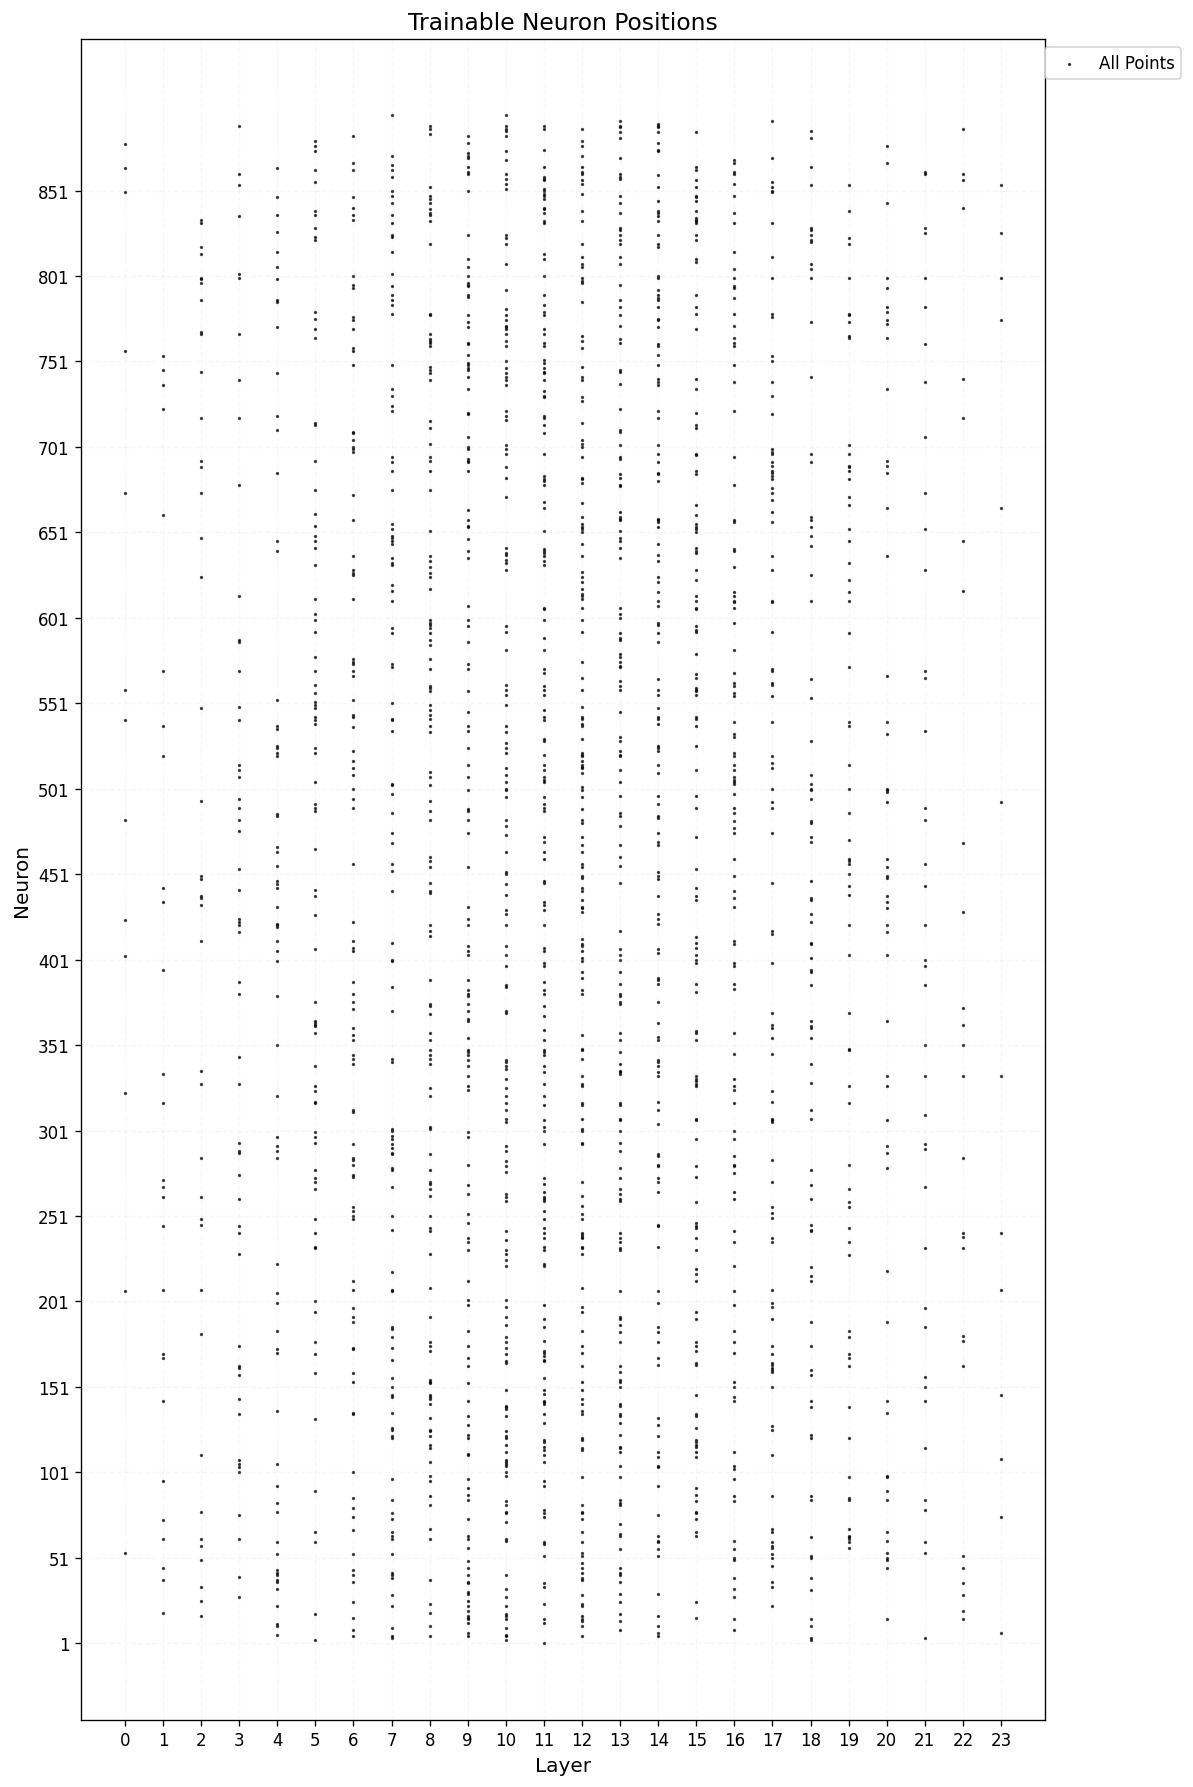

In [83]:
json_path = "/workspace/ftg/target_neurons/selected_neurons_spindle.json" 

with open(json_path, encoding="utf-8") as f:
    target = json.load(f)
display_target_neurons(target)

In [40]:
target_neurons_list = [pos for pos in top_10_percent_dict.keys()]
print(target_neurons_list)
file_name = "mmlu_10percent.json"
with open(f"./target_neurons/{file_name}", "w", encoding="utf-8") as f:
    json.dump(target_neurons_list, f, ensure_ascii=False, indent=4)


[(0, 26), (0, 41), (0, 56), (0, 91), (0, 119), (0, 125), (0, 126), (0, 130), (0, 144), (0, 177), (0, 184), (0, 209), (0, 231), (0, 240), (0, 243), (0, 252), (0, 256), (0, 293), (0, 296), (0, 394), (0, 403), (0, 440), (0, 443), (0, 496), (0, 517), (0, 518), (0, 524), (0, 539), (0, 540), (0, 549), (0, 611), (0, 615), (0, 635), (0, 639), (0, 655), (0, 672), (0, 676), (0, 677), (0, 700), (0, 725), (0, 742), (0, 750), (0, 759), (0, 793), (0, 834), (0, 841), (0, 846), (0, 848), (0, 851), (0, 868), (0, 882), (0, 889), (1, 0), (1, 20), (1, 40), (1, 65), (1, 66), (1, 69), (1, 74), (1, 98), (1, 100), (1, 112), (1, 114), (1, 126), (1, 132), (1, 166), (1, 182), (1, 188), (1, 189), (1, 201), (1, 211), (1, 228), (1, 248), (1, 249), (1, 259), (1, 260), (1, 287), (1, 299), (1, 307), (1, 310), (1, 313), (1, 357), (1, 365), (1, 373), (1, 374), (1, 424), (1, 457), (1, 463), (1, 480), (1, 503), (1, 510), (1, 519), (1, 521), (1, 529), (1, 560), (1, 561), (1, 585), (1, 586), (1, 593), (1, 605), (1, 666), (1

# 合并神经元

In [ ]:
import json

def merge_and_sum_dicts(file1, file2):
    # 读取第一个 JSON 文件
    with open(file1, 'r') as f1:
        dict1 = json.load(f1)
    
    # 读取第二个 JSON 文件
    with open(file2, 'r') as f2:
        dict2 = json.load(f2)
    
    # 创建一个新的字典来存储相加后的值
    result = {}
    
    # 遍历第一个字典的键
    for key in dict1:
        if key in dict2:
            # 如果键在两个字典中都存在，将值相加
            result[key] = dict1[key] + dict2[key]
        else:
            # 如果键只在第一个字典中存在，直接添加到结果中
            result[key] = dict1[key]
    
    # 遍历第二个字典的键，处理只在第二个字典中存在的键
    for key in dict2:
        if key not in dict1:
            result[key] = dict2[key]
    
    return result

# 示例用法
file1 = '/workspace/ftg/test/ll_merged.json'
file2 = '/workspace/ftg/test/lm_mmlu.json'
result_dict = merge_and_sum_dicts(file1, file2)
print(result_dict)
with open("merged.json", "w", encoding="utf-8") as f:
    json.dump(result_dict, f, ensure_ascii=False, indent=4)

In [ ]:
import h5py
filename = "/workspace/ftg/hdf5/mmlu.h5"
with h5py.File(filename, "a") as f:
    print(f["dataset"].shape)

In [ ]:
from datasets import load_dataset
from tqdm import tqdm
mmlu_all_sets = [
    "college_biology",
    "college_chemistry",
    "college_computer_science",
    "college_mathematics",
    "college_physics",
    "electrical_engineering",
    "astronomy",
    "anatomy",
    "abstract_algebra",
    "machine_learning",
    "clinical_knowledge",
    "global_facts",
    "management",
    "nutrition",
    "marketing",
    "professional_accounting",
    "high_school_geography",
    "international_law",
    "moral_scenarios",
    "computer_security",
    "high_school_microeconomics",
    "professional_law",
    "medical_genetics",
    "professional_psychology",
    "jurisprudence",
    "world_religions",
    "philosophy",
    "virology",
    "high_school_chemistry",
    "public_relations",
    "high_school_macroeconomics",
    "human_sexuality",
    "elementary_mathematics",
    "high_school_physics",
    "high_school_computer_science",
    "high_school_european_history",
    "business_ethics",
    "moral_disputes",
    "high_school_statistics",
    "miscellaneous",
    "formal_logic",
    "high_school_government_and_politics",
    "prehistory",
    "security_studies",
    "high_school_biology",
    "logical_fallacies",
    "high_school_world_history",
    "professional_medicine",
    "high_school_mathematics",
    "college_medicine",
    "high_school_us_history",
    "sociology",
    "econometrics",
    "high_school_psychology",
    "human_aging",
    "us_foreign_policy",
    "conceptual_physics",
]
total_len = 0
for subset in tqdm(mmlu_all_sets):
    dataset = load_dataset("cais/mmlu", subset)
    total_len += len(dataset["test"])
    print(total_len)
    print(subset)

# 合并H5

In [ ]:
import h5py

f1 = h5py.File("/workspace/ftg/hdf5/mmlu.h5", "a")
f2 = h5py.File("/workspace/ftg/hdf5/mmlu_last.h5", "a")
# 打开 HDF5 文件
dset1 = f1["dataset"]
dset2 = f2["dataset"]
m, n = dset1.shape[1:]
# 确定合并后的数据集大小
a = dset1.shape[0]
b = dset2.shape[0]
total_size = a + b

# 扩展目标数据集的形状
dset1.resize((total_size, m, n))

# 将 dset2 的数据追加到 dset1
dset1[a:] = dset2[:]

In [ ]:
import h5py
with h5py.File('/workspace/ftg/hdf5/mmlu.h5', 'a') as f:
    dset = f['dataset']
    print(dset.shape)

In [ ]:
import numpy as np

def standardize_axis(arr, axis=0):
    """将指定轴上的数据标准化（均值为0，标准差为1）"""
    mean_vals = np.mean(arr, axis=axis, keepdims=True)
    std_vals = np.std(arr, axis=axis, keepdims=True)
    return (arr - mean_vals) / std_vals

# 示例
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# 对每列（axis=0）进行标准化
standardized_arr = standardize_axis(arr, axis=0)
print(standardized_arr)

# 对每行（axis=1）进行标准化
standardized_arr = standardize_axis(arr, axis=1)
print(standardized_arr)

In [ ]:
import numpy as np

def normalize_axis(arr, axis=0):
    """将指定轴上的数据缩放到0到1的范围"""
    min_vals = np.min(arr, axis=axis, keepdims=True)
    max_vals = np.max(arr, axis=axis, keepdims=True)
    return (arr - min_vals) / (max_vals - min_vals)

# 示例
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]], dtype=np.float16)

# 对每列（axis=0）进行归一化
normalized_arr = normalize_axis(arr, axis=0)
print(normalized_arr)

# 对每行（axis=1）进行归一化
normalized_arr = normalize_axis(arr, axis=1)
print(normalized_arr)

In [ ]:
import h5py
import numpy as np
import json

def select_trainable_neurons(hdf5_path, dataset_name, n_percent):
    """
    参数说明：
    hdf5_path: HDF5文件路径
    dataset_name: 数据集的名称
    n_percent: 需要训练的参数百分比（0-100之间的数值）

    """
    # 读取HDF5数据集
    with h5py.File(hdf5_path, 'r') as f:
        gradients = np.array(f[dataset_name])
    print(gradients.shape)
    num_inferences, num_layers, num_neurons = gradients.shape
    
    # 计算每层需要选择的神经元数量
    k_per_layer = max(1, int(num_neurons * n_percent / 100 ))
    print(f"每层需要选择的神经元数量{k_per_layer}")
    
    # 初始化神经元计数矩阵
    neuron_counts = np.zeros((num_layers, num_neurons), dtype=int)
    
    # 遍历所有推理数据和层
    for infer_idx in range(num_inferences):
        for layer_idx in range(num_layers):
            # 获取当前层的梯度积分
            layer_grad = gradients[infer_idx, layer_idx, :]
            
            # 执行min-max归一化
            min_val = np.min(layer_grad)
            max_val = np.max(layer_grad)
            if max_val == min_val:
                normalized = np.zeros_like(layer_grad)
            else:
                normalized = (layer_grad - min_val) / (max_val - min_val)
            
            # 选择梯度积分最低的k个神经元
            smallest_indices = np.argsort(normalized)[:k_per_layer]
            neuron_counts[layer_idx, smallest_indices] += 1
    
    # 为每层选择最终可训练神经元
    result = []
    for layer_idx in range(num_layers):
        # 获取当前层的计数并排序
        counts = neuron_counts[layer_idx]
        sorted_indices = np.argsort(counts)[::-1]  # 降序排列
        
        # 选择前k_per_layer个神经元
        selected_indices = sorted_indices[:k_per_layer]
        # selected_counts = counts[selected_indices]
        
        # 构建结果元组列表
        result.extend([(layer_idx, int(idx)) for idx in selected_indices])
        # result.append([(int(idx), int(count)) for idx, count in zip(selected_indices, selected_counts)])
    
    return result

# 使用示例
if __name__ == "__main__":
    result = select_trainable_neurons('/workspace/ftg/hdf5/mmlu.h5', 'dataset', 10)
    
    # 将result写入JSON文件
    with open("selected_neurons.json", "w", encoding="utf-8") as f:
        json.dump(result, f, ensure_ascii=False, indent=4)

    print("JSON 文件已生成！")

(14042, 24, 896)
每层需要选择的神经元数量89


TypeError: 'int' object is not subscriptable

# 生成纺锤形可训练神经元位置

In [9]:
# 读取HDF5数据集
import h5py
hdf5_path = "./hdf5/Qwen2.5-0.5B-Instruct/mmlu_7steps.h5"

with h5py.File(hdf5_path, "r") as f:
    gradients = np.array(f["dataset"])

In [13]:
import os

# 获取文件夹名称
model_name = os.path.basename(os.path.dirname(hdf5_path))
save_dir = f"./target_neurons/{model_name}"

N_PERCENT = 40
result_path = f"{save_dir}/{N_PERCENT}.json"
# 若文件夹不存在则创建
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [15]:
import numpy as np
import json


def generate_spindle_array(P):
    """生成长度为 P 的纺锤形数组"""
    if P % 2 == 1:  # P 是奇数
        peak = (P // 2) + 1
        spindle = list(range(1, peak)) + list(range(peak, 0, -1))
    else:  # P 是偶数
        peak = P // 2
        spindle = list(range(1, peak + 1)) + list(range(peak, 0, -1))
    return spindle


def split_n_into_spindle_parts(P):
    """返回归一化的纺锤形数组，求和为 1"""
    spindle = generate_spindle_array(P)
    total = sum(spindle)
    normalized_spindle = [s / total for s in spindle]  # 归一化
    return normalized_spindle


def select_trainable_neurons(gradients, n_percent):
    """
    参数说明：
    hdf5_path: HDF5文件路径
    dataset_name: 数据集的名称
    n_percent: 需要训练的参数百分比（0-100之间的数值）

    """

    print(gradients.shape)
    num_inferences, num_layers, num_neurons = gradients.shape
    num_trainable = num_layers * num_neurons * n_percent / 100
    # 计算每层需要选择的神经元数量
    spindle_parts = split_n_into_spindle_parts(num_layers)

    # k_per_layer = max(1, int(num_neurons * n_percent / 100 ))
    k_per_layer = list(map(lambda x: int(x * num_trainable), spindle_parts))
    print(f"每层需要选择的神经元数量{k_per_layer}")

    # 初始化神经元计数矩阵
    neuron_counts = np.zeros((num_layers, num_neurons), dtype=int)

    # 遍历所有推理数据和层
    for infer_idx in range(num_inferences):
        for layer_idx in range(num_layers):
            # 获取当前层的梯度积分
            layer_grad = gradients[infer_idx, layer_idx, :]

            # 执行min-max归一化
            min_val = np.min(layer_grad)
            max_val = np.max(layer_grad)
            if max_val == min_val:
                normalized = np.zeros_like(layer_grad)
            else:
                normalized = (layer_grad - min_val) / (max_val - min_val)

            # 选择梯度积分最低的k个神经元
            smallest_indices = np.argsort(normalized)[: k_per_layer[layer_idx]]
            neuron_counts[layer_idx, smallest_indices] += 1

    # 为每层选择最终可训练神经元
    result = []
    for layer_idx in range(num_layers):
        # 获取当前层的计数并排序
        counts = neuron_counts[layer_idx]
        sorted_indices = np.argsort(counts)[::-1]  # 降序排列

        # 选择前k_per_layer个神经元
        selected_indices = sorted_indices[: k_per_layer[layer_idx]]
        # selected_counts = counts[selected_indices]

        # 构建结果元组列表
        # result.extend([(layer_idx, int(idx)) for idx in selected_indices])
        result.append(selected_indices.tolist())

    return result


result = select_trainable_neurons(gradients, N_PERCENT)

# 将result写入JSON文件
with open(result_path, "w", encoding="utf-8") as f:
    json.dump(result, f, ensure_ascii=False, indent=4)

print("JSON 文件已生成！")

(14042, 24, 896)
每层需要选择的神经元数量[55, 110, 165, 220, 275, 330, 385, 441, 496, 551, 606, 661, 661, 606, 551, 496, 441, 385, 330, 275, 220, 165, 110, 55]
JSON 文件已生成！


In [49]:
def generate_spindle_array(P):
    """生成纺锤形数组"""
    spindle = list(range(1, P + 1)) + list(range(P - 1, 0, -1))
    return spindle

def split_n_into_spindle_parts(n, P):
    """将 n 拆分为纺锤形的 P 份，支持浮点数"""
    spindle = generate_spindle_array(P)
    total = sum(spindle)
    parts = [n * s / total for s in spindle]  # 使用除法确保结果为浮点数
    return parts

# 示例
n = 10
P = 24
spindle_array = generate_spindle_array(P)
spindle_parts = split_n_into_spindle_parts(n, P)

print("纺锤形数组:", spindle_array)
print("拆分结果:", spindle_parts)
print("总和:", sum(spindle_parts))

纺锤形数组: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
拆分结果: [0.017361111111111112, 0.034722222222222224, 0.052083333333333336, 0.06944444444444445, 0.08680555555555555, 0.10416666666666667, 0.12152777777777778, 0.1388888888888889, 0.15625, 0.1736111111111111, 0.1909722222222222, 0.20833333333333334, 0.22569444444444445, 0.24305555555555555, 0.2604166666666667, 0.2777777777777778, 0.2951388888888889, 0.3125, 0.3298611111111111, 0.3472222222222222, 0.3645833333333333, 0.3819444444444444, 0.3993055555555556, 0.4166666666666667, 0.3993055555555556, 0.3819444444444444, 0.3645833333333333, 0.3472222222222222, 0.3298611111111111, 0.3125, 0.2951388888888889, 0.2777777777777778, 0.2604166666666667, 0.24305555555555555, 0.22569444444444445, 0.20833333333333334, 0.1909722222222222, 0.1736111111111111, 0.15625, 0.1388888888888889, 0.12152777777777778, 0.10416666666666667, 0.0